In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

%matplotlib inline

# Basics

## Reading and saving files
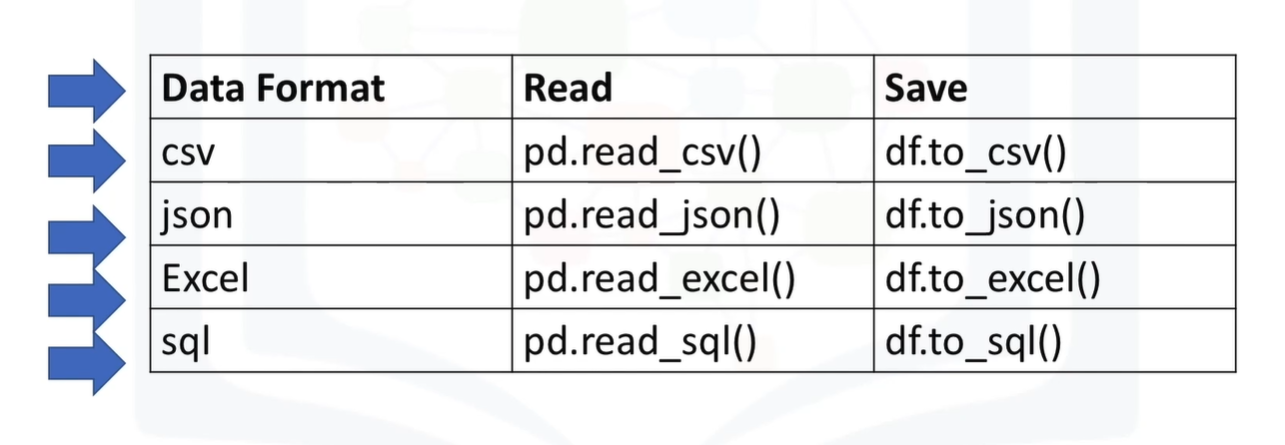

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'
df = pd.read_csv(url, header=None)
display(df.head(5))
display(df.tail(5))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Inserting headers

In [4]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns=headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


To display counts and types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.to_csv("df.txt")

## Data types
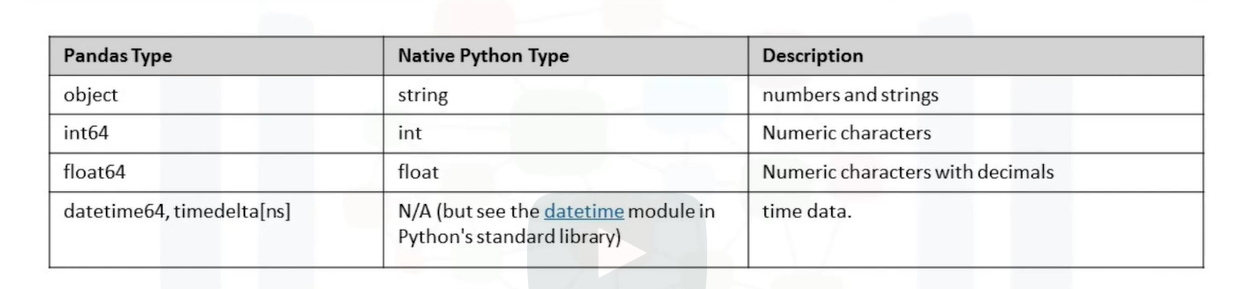

To display the datatypes of each column in a series:

In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Basic manipulations

### Replace

In [9]:
df.replace('?', np.NaN, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Drop NaNs
axis=0 drops rows \
axis=1 drops columns \
\
inplace=True enables the dataframe to be changed directly without having to create another dataframe with the modification

In [10]:
df.dropna(subset=["price"], axis=0, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Addition

In [11]:
df_edit = df.copy()
df_edit['symboling'] = df_edit['symboling'] + 1
df_edit

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,3,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Renaming a column

In [12]:
df_edit = df.copy()
df_edit.rename(columns={'city-mpg': 'city_L/100km'}, inplace=True)
print(df_edit)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

### Setting a column to be the index
df.set_index('Column name', inplace=True)

### Changing column datatype

In [13]:
df_edit = df.copy()
df_edit.replace('?', np.nan, inplace=True)
df_edit.dropna(subset=['normalized-losses'], inplace=True)
df_edit['normalized-losses'].astype(int)
df_edit

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Filter out numeric data

In [14]:
df_num = df._get_numeric_data()
df_num.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


## Selecting a row (loc)
```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```
Can also select a value from a column in that specific row
```python
    df.loc[index_label, column_label]   
    df.iloc[index_label, column_label]   
```

In [16]:
row = df.loc[0] # if row index was 'entry_1', then this could be inputted
row

symboling                      3
normalized-losses            NaN
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-ratio            9.0
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

In [18]:
row = df.iloc[0]
row

symboling                      3
normalized-losses            NaN
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-ratio            9.0
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

## Filtering based on criteria
Pass the condition as a boolean vector --> returns mask array. To return the entries from the df, pass the condition into the df

In [19]:
selection = df['make'] == 'alfa-romero'
selection

0       True
1       True
2       True
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: make, Length: 201, dtype: bool

In [20]:
df[selection]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [26]:
selection = (df['make'] == 'volvo') & (df['drive-wheels'] == 'rwd')
df[selection]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Quick statistics 
returns basic statistics, skips rows and columns not containing numbers by default

### Describe

In [ ]:
df.describe()

To include object types: \
unique=number of distinct objects \
top=most frequently occuring object \
freq=number of times the top object appears

In [ ]:
df.describe(include='all')

Only for select cols

In [ ]:
df.describe(include=['object'])

In [36]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


### Value counts
How many of a characteristive/categorical variable lies in each class. Only works on pandas series, not dfs --> use single bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p> \
\
Convert series to df --> <code>to_frame()</code>

In [38]:
dw = df['drive-wheels'].value_counts()
print(type(dw))
dw = dw.to_frame()
dw

<class 'pandas.core.series.Series'>


,drive-wheels
fwd,118
rwd,75
4wd,8


# Dealing with missing values

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column (only if most entries are empty)
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency (replace with mode)<br>
        c. Replace it based on other functions
    </li>
</ol>

Ex) normalized-losses, stroke, bore, horsepower, peak-rpm: replace with mean \
num-of-doors: replace with mode\
price: replace entire row since entry cannot be used for prediction

## Evaluating for missing data
To identify missing data, isnull() or notnull() gives boolean answer \
value_counts counts the number of times each entry appears in the selection

In [19]:
df.replace('?', np.nan, inplace=True)
missing_data = df.isnull()
for column in missing_data.columns.values.tolist(): # iterates through column names
    print(column)
    print(missing_data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Replacing with the mean of the column

In [20]:
normalized_loss_mean = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, normalized_loss_mean, inplace=True)
print(df['normalized-losses'].notnull().value_counts())

bore_mean = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, bore_mean, inplace=True)
print(df['bore'].notnull().value_counts())

stroke_mean = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, stroke_mean, inplace=True)
print(df['stroke'].notnull().value_counts())

horsepower_mean = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, horsepower_mean, inplace=True)
print(df['horsepower'].notnull().value_counts())

peak_rpm_mean = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, horsepower_mean, inplace=True)
print(df['peak-rpm'].notnull().value_counts())

True    205
Name: normalized-losses, dtype: int64
True    205
Name: bore, dtype: int64
True    205
Name: stroke, dtype: int64
True    205
Name: horsepower, dtype: int64
True    205
Name: peak-rpm, dtype: int64


## Replacing with the mode
idxmax() returns the category from value_counts with the highest frequency

In [21]:
mode_category = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode_category, inplace=True)
print(df['num-of-doors'].notnull().value_counts())

True    205
Name: num-of-doors, dtype: int64


## Drop rows
Remember to reset the index. reset_index makes the old index a column and ads a number index. Drop=True makes it such that the index is not added as a column

In [22]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df['price'])

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
196    16845
197    19045
198    21485
199    22470
200    22625
Name: price, Length: 201, dtype: object


## Changing column datatype

In [23]:
df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype('float')
df[['normalized-losses', 'horsepower']] = df[['normalized-losses', 'horsepower']].astype('int')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Normalization
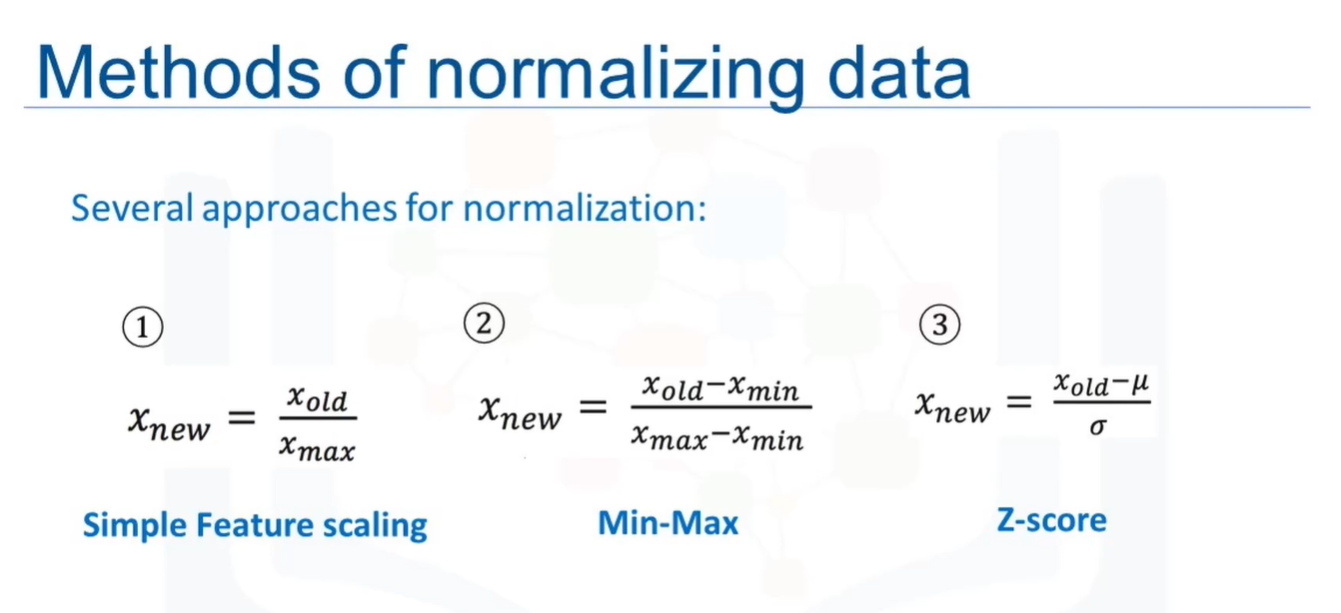
Simple Feature: between 0 and 1 \
Min-max: between 0 and 1 \
Z-score: around -3 to 3 (also called data standardisation)

## Feature normalization 

In [24]:
df_edit = df.copy()
df_edit['length'] = df_edit['length']/df_edit['length'].max()
df_edit['length']

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
196    0.907256
197    0.907256
198    0.907256
199    0.907256
200    0.907256
Name: length, Length: 201, dtype: float64

## Min-max normalization

In [25]:
df_edit = df.copy()
df_edit['length'] = (df_edit['length'] - df_edit['length'].min())/(df_edit['length'].max() - df_edit['length'].min())
df_edit['length']

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
196    0.711940
197    0.711940
198    0.711940
199    0.711940
200    0.711940
Name: length, Length: 201, dtype: float64

## Z-score

In [26]:
df_edit = df.copy()
df_edit['length'] = (df_edit['length'] - df_edit['length'].mean())/df_edit['length'].std()
df_edit['length']

0     -0.438315
1     -0.438315
2     -0.243544
3      0.194690
4      0.194690
         ...   
196    1.184775
197    1.184775
198    1.184775
199    1.184775
200    1.184775
Name: length, Length: 201, dtype: float64

# Data wrangling and preparation
The process of converting data from the initial format to a format that may be better for analyses

## Data binning

In [27]:
bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
group_names = ['low', 'medium', 'high']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
9,101,low


## Turning categorical variables into quantitative variables
use get_dummies() method, generates a list of numbers each corresponding to a particular category of the variable (one column for each variable). This is done to use categorical variables for regression analysis \
contat() merges the dummy and the original dataframe. drop() deletes the old column

In [28]:
dummy_var = pd.get_dummies(df['fuel-type'])
dummy_var.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
df = pd.concat([df, dummy_var], axis=1) # axis=1 to concat along columns
df.drop('fuel-type', axis=1, inplace=True)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000.0,21,27,13495.0,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000.0,21,27,16500.0,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000.0,19,26,16500.0,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500.0,24,30,13950.0,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500.0,18,22,17450.0,low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.40,8.5,110,5500.0,19,25,15250.0,low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,192.7,...,3.40,8.5,110,5500.0,19,25,17710.0,low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,192.7,...,3.40,8.5,110,5500.0,19,25,18920.0,low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,3.40,8.3,140,5500.0,17,20,23875.0,medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,176.8,...,2.80,8.8,101,5800.0,23,29,16430.0,low,0,1


## Grouping

### Unique
Returns the categories in a categorical variable column

In [41]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

### Group-by
Returns a group-by object (exactly the same as the inputed df). Turns into DF if an operation is performed (mean, mode etc) or if head()/tail() etc used. \
Groups can be obtained using the get_group() function \
as_index = False ensures that the groups are not made into a new multi-index

In [86]:
df_group = df[['drive-wheels', 'body-style', 'price']]
df_groupby = df_group.groupby(['drive-wheels'], as_index=False)
df_groupby.head(5)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [87]:
df_groupby.mean()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [51]:
df_group = df[['drive-wheels', 'body-style', 'price']]
df_groupby = df_group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_groupby

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [88]:
df_groupby.get_group('4wd')

,drive-wheels,body-style,price
4,4wd,sedan,17450.0
136,4wd,hatchback,7603.0
140,4wd,sedan,9233.0
141,4wd,sedan,11259.0
144,4wd,wagon,8013.0
145,4wd,wagon,11694.0
150,4wd,wagon,7898.0
151,4wd,wagon,8778.0


## Pivot table
where there is only a single value for every combination of categorical variables

In [56]:
df_pivot = df_groupby.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Sorting
for descending: ascending=False

In [27]:
df_sort = df.sort_values('price', ascending=False)
df_sort.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
169,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
143,0,102,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960


# Pearson correlation
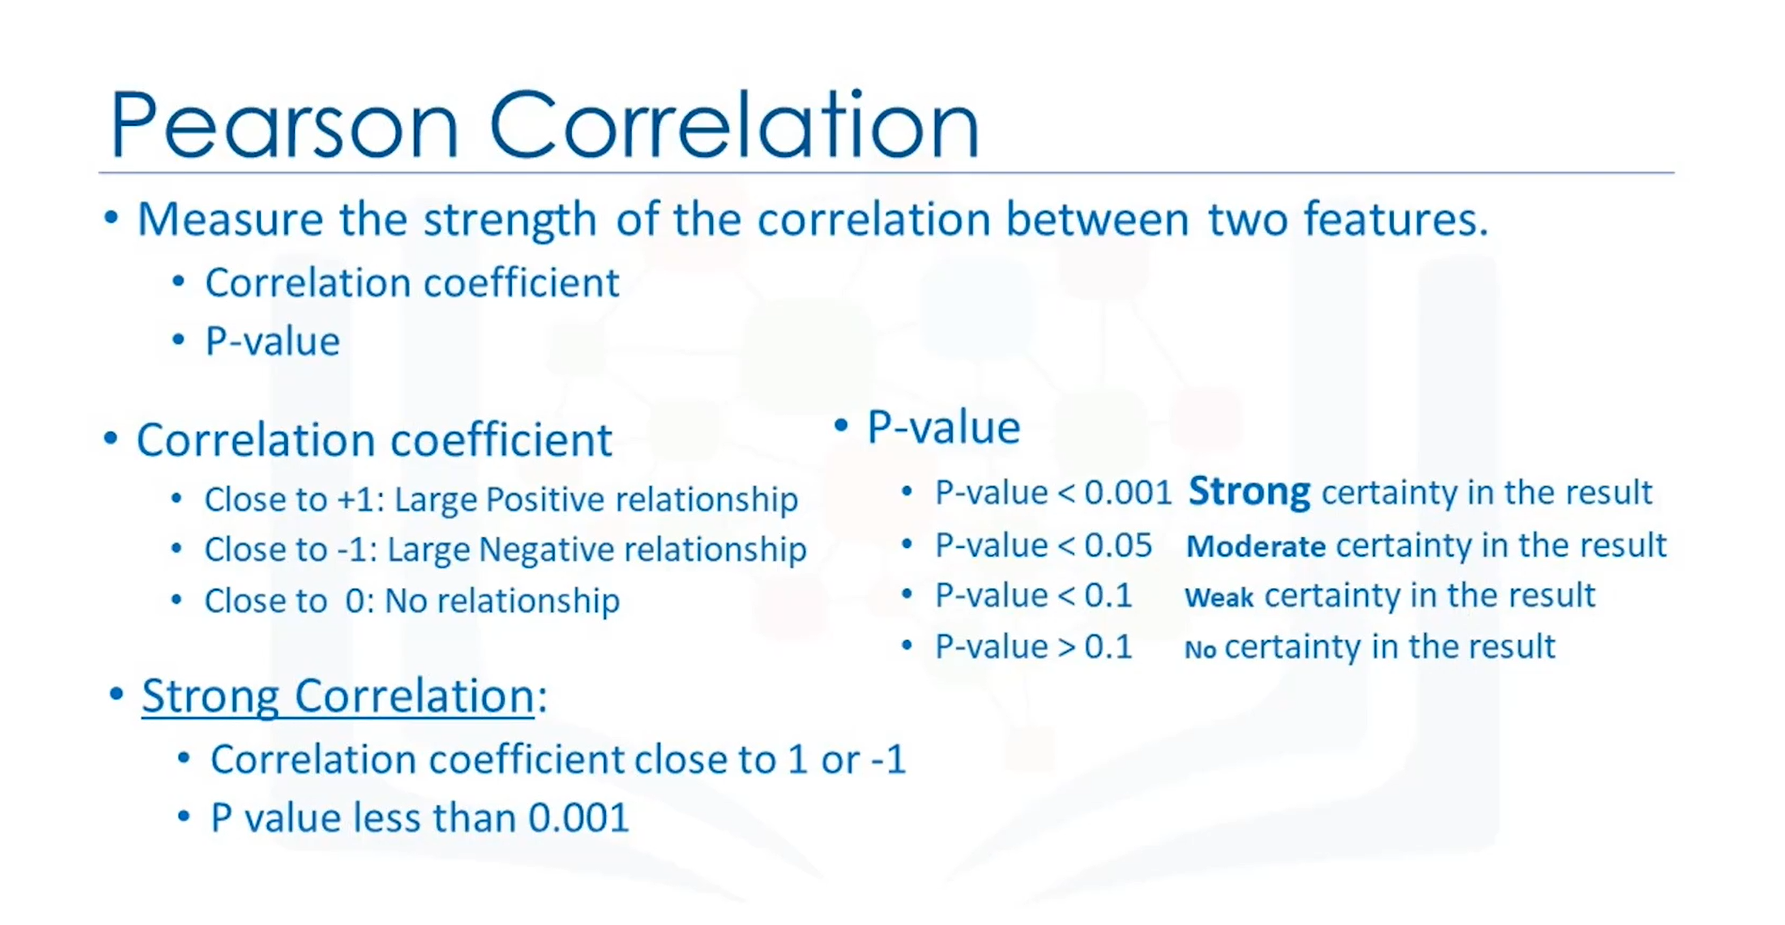
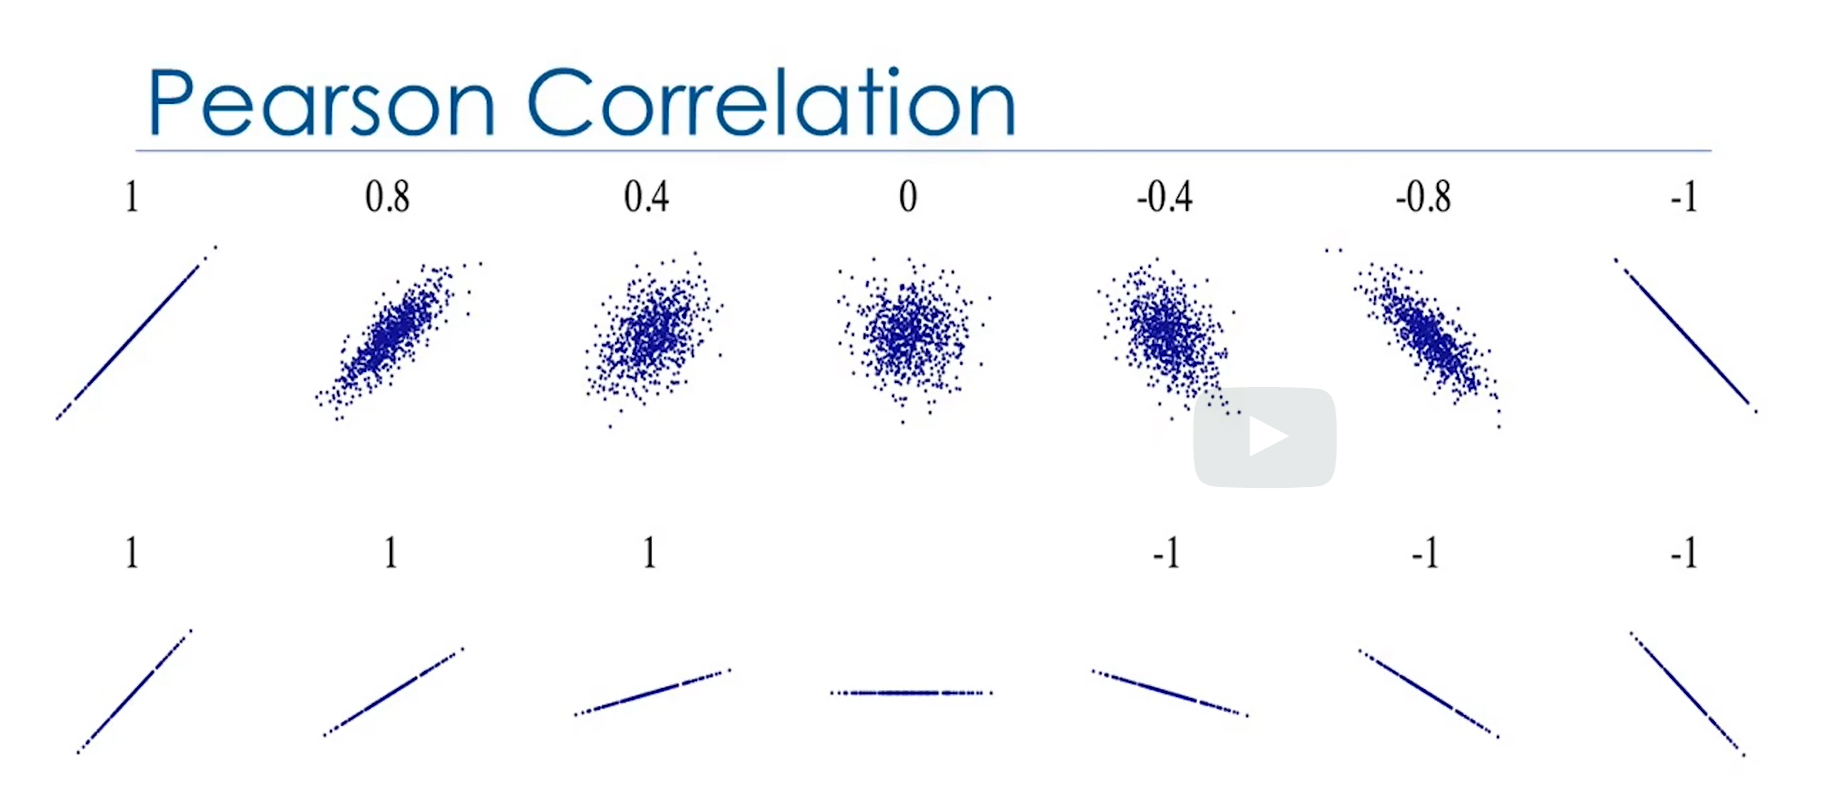

## Correlation coefficient for entire DF (only numerical variables)

In [29]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.184347,-0.035527,0.036233,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.165753,-0.225016,-0.181877,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.217007,-0.470606,-0.543304,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.227064,-0.665192,-0.698142,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.192938,-0.633531,-0.680635,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.187275,-0.049800,-0.104812,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.188224,-0.749543,-0.794889,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.186611,-0.650546,-0.679571,0.872335,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.220076,-0.582027,-0.591309,0.543155,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.191855,-0.033956,-0.034636,0.082269,0.241064,-0.241064


## Correlation coeff and P-value

In [74]:
pearson, p_value = stats.pearsonr(df['wheel-base'], df['price'])
pearson, p_value

(0.5846418222655081, 8.076488270732989e-20)

# ANOVA
Analyses of variance: tests whether there are significant differences betweeen the means of two of more groups \
F-test score: calculates how much the actual mean deviates from the mean if the means were the same. Larger = larger deviation of the means (indicates the variable is dependant on the categories) \
P-value: indicates statistical significance.

In [75]:
df_group

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [90]:
df_dwgrouped = df_group[['drive-wheels', 'price']].groupby(['drive-wheels'])
fwd_group = df_dwgrouped.get_group('fwd')['price']
rwd_group = df_dwgrouped.get_group('rwd')['price']
fourwd_group = df_dwgrouped.get_group('4wd')['price']

f_val, p_val = stats.f_oneway(fwd_group, rwd_group, fourwd_group)
f_val, p_val

(67.95406500780399, 3.3945443577151245e-23)

# Plotting

## Simple fitted regression line plot for numerical variables

<AxesSubplot:xlabel='engine-size', ylabel='price'>

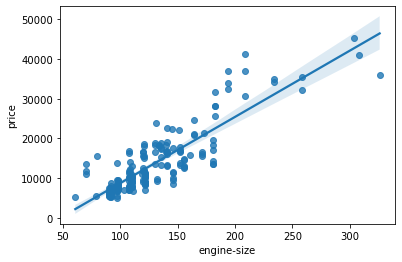

In [73]:
sns.regplot(data=df, x='engine-size', y='price')

## Residual plot
difference between the observed value and the predicted value (from a linear regression). Residual = distance from the data point to the fitted regression line.\
Linear plot appropriate when points are randomly spread out around x-axis

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

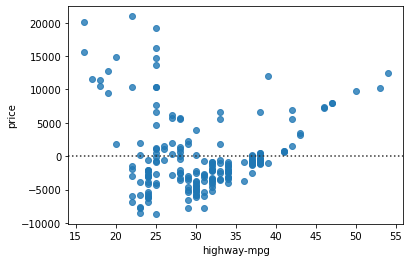

In [100]:
sns.residplot(x=df['highway-mpg'], y=df['price'])

## Distribution plot
Kernel density estimation

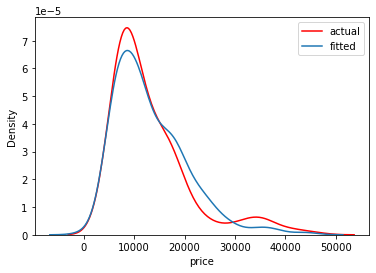

In [115]:
ax1 = sns.kdeplot(data=df, x=df['price'], color='r', label='actual')
sns.kdeplot(data=df, x=y_hat, label='fitted', ax=ax1)
plt.legend()

## Bar plot for categorical variables

<AxesSubplot:xlabel='body-style', ylabel='price'>

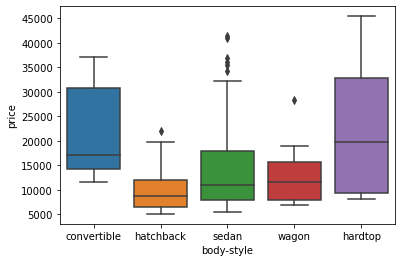

In [32]:
sns.boxplot(data=df, x='body-style', y='price')

## Heat map for categorical variables
Plots with row labels on y and column labels on x axes respectively.

In [59]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

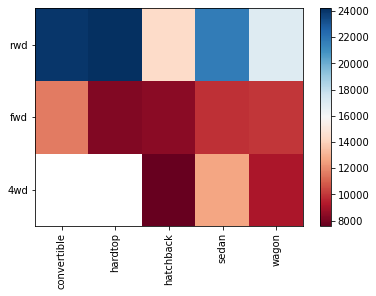

In [69]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot,  cmap='RdBu')

# center ticks
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

# labels
row_labels = df_pivot.columns.levels[1] # since the first column label is 'price'
col_labels = df_pivot.index
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)
plt.xticks(rotation=90)

fig.colorbar(im)

In [61]:
df_pivot.columns.levels[1]

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')

In [63]:
df_pivot.columns

MultiIndex([('price', 'convertible'),
            ('price',     'hardtop'),
            ('price',   'hatchback'),
            ('price',       'sedan'),
            ('price',       'wagon')],
           names=[None, 'body-style'])

# Regression models


##  Linear Regression
x variable needs to be a 2d array or a dataframe (not a series)

In [136]:
lrm = LinearRegression()

# fit
x = df[['highway-mpg']]
y = df['price']
lrm.fit(x, y)

# predict
y_hat = lrm.predict(x)

In [137]:
# intercept and slope
intercept = lrm.intercept_
slope = lrm.coef_
print(intercept, slope)

38423.305858157386 [-821.73337832]


## Multiple linear regression
$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4...
$$


In [138]:
lrm = LinearRegression()

# fit
xs = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lrm.fit(xs, y)

# predict
y_hat = lrm.predict(xs)

## Polynomial regression
By creating new polynomial features, this can be considered a special case of general linear regression.

### Single polynomial regression

In [116]:
x = df['highway-mpg']
y = df['price']
poly_coef = np.polyfit(x, y, 3) # 3rd order
poly_model = np.poly1d(poly_coef)
print(poly_model)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [118]:
y_hat = poly_model(x)

### Multiple polynomial regression
$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$ \
as default, the first feature outputed = 1 since this is the feature multiplied by the bias to ensure the bias is included in the linear model
PolynomialFeatures(degree=.., include_bias=False) negates this

In [129]:
pf = PolynomialFeatures(degree=2)
xs = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
xs_pf = pf.fit_transform(xs)

## Ridge regression
Used in multiple regression models when multicollinearity occures (interactions between the independant variables)
Controls the maginitude of the polynomial coefficients using alpha --> dampens the effect of higher order polynomials \
We use validation data to select the alpha (similar to test data, but used to select parameters like alpha) \
\
select alpha --> train --> predict --> r^2 using validation data \
the alpha with the best r2 is chosen

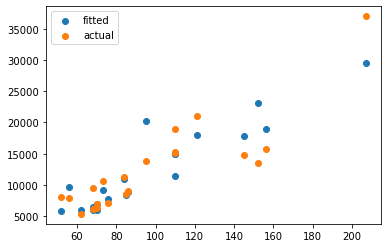

In [207]:
# polynomial features
pf = PolynomialFeatures(degree=3)
x_train_pf = pf.fit_transform(x_train[['horsepower', 'engine-size', 'highway-mpg']])
x_test_pf = pf.fit_transform(x_test[['horsepower', 'engine-size', 'highway-mpg']])

rm = Ridge(alpha=1e4) # treat as normal LinearRegression object
rm.fit(x_train_pf, y_train)
yhat = rm.predict(x_test_pf)

plt.figure()
plt.scatter(x_test['horsepower'], yhat, label='fitted')
plt.scatter(x_test['horsepower'], y_test, label='actual')
plt.legend()

# Pipelines
Simplify the data processing steps \
inputed as tuples in a list

In [176]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('polynomial_features', PolynomialFeatures(degree=3)), 
                     ('model', LinearRegression())])
pipeline.fit(xs, y)
y_hat = pipeline.predict(xs)

# Model evaluation
Generalization performance: generalization error is a measure of how well the data does at predicting unseen data. ie) the error in the real world \
The error obtained using testing data is an approximation of this error \
\
A dataset is split into training and testing data. Using different ratios of the data changes the model performance \
There is a trade-off when using different ratios of training data and testing data:\
Using more training data: gives an accurate estimation of generalization error; however the precision of the estimate will be low \

Using more testing data: gives a precise estimation of generalization error; however the 
Thus, we use cross-validation: split data into folds (divisions). X folds are used for training and total - x folds are used for testing. Each combination of folds are used to train and test. We then use the average error for out-of-sample error


## $R^2$ value
$R^2$*100 = the percentage of the variation in the response of y that is explained by the variation in x. 

$R^2 = 1 - \frac{\text{MSE of regression line}}{\text{MSE from the mean}}$

s the percentage of the variation in the response variable y  that is explained by the variation in explanatory variable(s) x. The Mean Squared Error tells you how close a regression line is to a set of points. It does this by taking the average distances from the actual points to the predicted points and squaring them.

### For Linear regression

In [164]:
# for 
x = df[['highway-mpg']]
y = df['price']
lrm.fit(x, y)
lrm.score(x, y) # uses the model of the last fit

0.4965911884339175

### For polynomial regression

In [173]:
r2 = r2_score(y, poly_model(x))
r2

0.674194666390652

## Splitting data for training and testing
random_state is the random seed for shuffeling \
shuffeling can be turned off with shuffeling=False

In [174]:
# x_data is all the features without price
x_data = df.drop('price', axis=1)

# y_data is just the price
y_data = df['price']

# split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=0)

## Cross validation score
fits the input model to the train data and calcs the r2 on the test data for each fold --> cv=#folds \
for mse, the function uses negative mse for maximisation, thus have to invert *-1

In [182]:
lrm = LinearRegression()
r2_cv = cross_val_score(lrm, x_data[['horsepower', 'highway-mpg']], y_data, cv=4)
r2_cv

array([0.77531099, 0.53083003, 0.75838321, 0.04006493])

In [183]:
r2_cv.mean()

0.5261472889730742

In [184]:
# mean squared error
mse_cv = -1*cross_val_score(lrm, x_data[['horsepower', 'highway-mpg']], y_data, cv=4, scoring='neg_mean_squared_error')
mse_cv

array([20192333.1734824 , 42507587.8621705 , 12015973.41461847,
       17715679.30998963])

## Cross validation predict 
I think it calculates the yhat for each fold and compiles them together (uses as many models as folds)

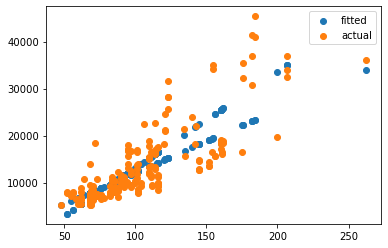

In [192]:
yhat = cross_val_predict(lrm, x_data[['horsepower']], y_data, cv=2)
plt.figure()
plt.scatter(x_data['horsepower'], yhat, label='fitted')
plt.scatter(x_data['horsepower'], y_data, label='actual')
plt.legend()

# Model Selection
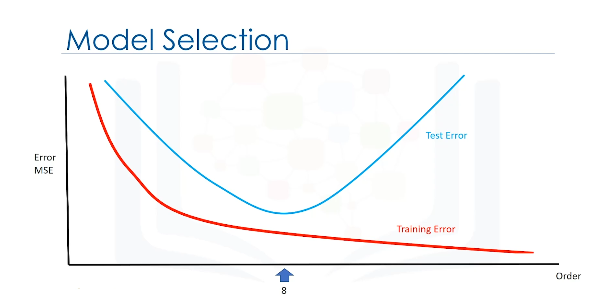

## Grid search
Hyperparameter: parameter not part of the fitting or training process (ex: alpha) \
Grid search iterates through hyperparameter values to optimise the r2 or mse. \
Data is split into three parts: training, validation and testing

In [214]:
alphas = list(np.logspace(-2, 10, 13))
parameters = {'alpha': alphas, 'normalize': [True, False]}
rrm = Ridge()
gs = GridSearchCV(rrm, parameters, cv=4)
gs.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_param = gs.best_estimator_
scores = gs.cv_results_

print(best_param)
for param, mean_test in zip(scores['params'], scores['mean_test_score']):
    print(param, mean_test)

Ridge(alpha=0.1, normalize=True)
{'alpha': 0.01, 'normalize': True} 0.6697928037558042
{'alpha': 0.01, 'normalize': False} 0.6645537268111891
{'alpha': 0.1, 'normalize': True} 0.6934070785675512
{'alpha': 0.1, 'normalize': False} 0.6645542494223743
{'alpha': 1.0, 'normalize': True} 0.6900130135048939
{'alpha': 1.0, 'normalize': False} 0.6645594720869575
{'alpha': 10.0, 'normalize': True} 0.32126167163145425
{'alpha': 10.0, 'normalize': False} 0.6646113563292745
{'alpha': 100.0, 'normalize': True} 0.016925529678910006
{'alpha': 100.0, 'normalize': False} 0.6650981342563871
{'alpha': 1000.0, 'normalize': True} -0.030337038615449646
{'alpha': 1000.0, 'normalize': False} 0.6680557685894766
{'alpha': 10000.0, 'normalize': True} -0.03531089603957127
{'alpha': 10000.0, 'normalize': False} 0.6724674823771882
{'alpha': 100000.0, 'normalize': True} -0.03581087144528733
{'alpha': 100000.0, 'normalize': False} 0.6569671607717149
{'alpha': 1000000.0, 'normalize': True} -0.03586089500099776
{'alpha'